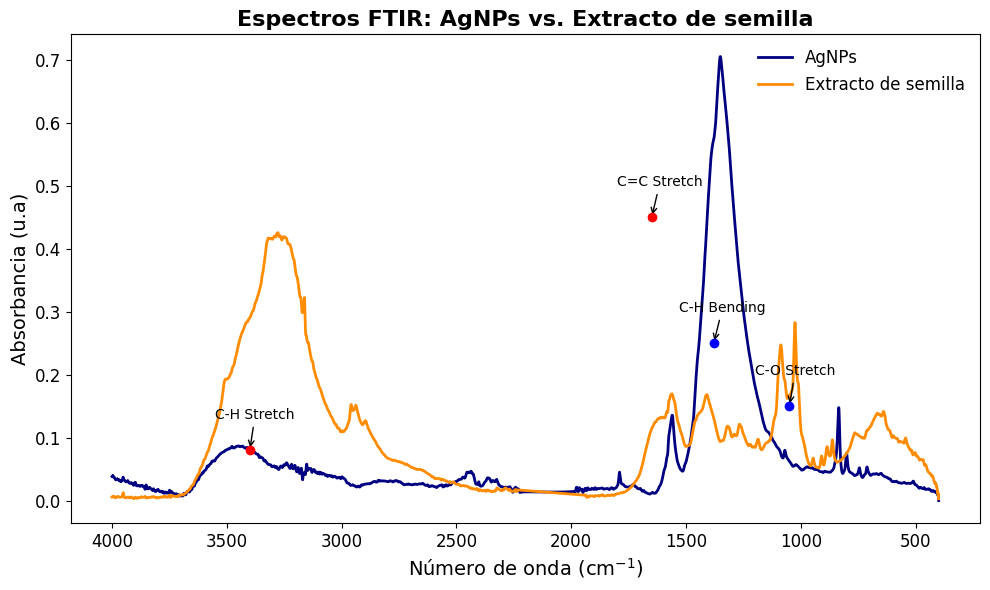

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta al archivo Excel
ruta_excel = '../files/input/FTIR.xlsx'

# Cargar el archivo Excel desde la segunda fila como encabezado
df = pd.read_excel(ruta_excel, header=1)

# Asignar columnas a variables
wn_ag = df['Número de onda (cm-1)']          # Número de onda (cm⁻¹) para AgNPs
abs_ag = df['Absorbancia (u.a)']             # Absorbancia (u.a) para AgNPs
wn_seed = df['Número de onda (cm-1).1']      # Número de onda (cm⁻¹) para Semilla
abs_seed = df['Absorbancia (u.a).1']         # Absorbancia (u.a) para Semilla

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar los espectros
plt.plot(wn_ag, abs_ag, label='AgNPs', color='navy', linewidth=2)
plt.plot(wn_seed, abs_seed, label='Extracto de semilla', color='darkorange', linewidth=2)

# Picos corregidos para AgNPs y Semilla (basados en máximos del espectro)
picos_ag = [(3400, 0.08, 'C-H Stretch'), (1650, 0.45, 'C=C Stretch')]
picos_seed = [(1380, 0.25, 'C-H Bending'), (1050, 0.15, 'C-O Stretch')]

# Anotar picos de AgNPs
for x, y, text in picos_ag:
    plt.scatter(x, y, color='red', zorder=5)  # Punto en el pico
    plt.annotate(text, xy=(x, y), xytext=(x+150, y+0.05),
                 fontsize=10, color='black',
                 arrowprops=dict(facecolor='red', arrowstyle='->'))

# Anotar picos de Semilla
for x, y, text in picos_seed:
    plt.scatter(x, y, color='blue', zorder=5)  # Punto en el pico
    plt.annotate(text, xy=(x, y), xytext=(x+150, y+0.05),
                 fontsize=10, color='black',
                 arrowprops=dict(facecolor='blue', arrowstyle='->'))

# Ajustar ejes y etiquetas
plt.gca().invert_xaxis()  # Invertir el eje X para estilo FTIR
plt.xlabel('Número de onda (cm$^{-1}$)', fontsize=14)
plt.ylabel('Absorbancia (u.a)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir título y leyenda mejorada
plt.title('Espectros FTIR: AgNPs vs. Extracto de semilla', fontsize=16, weight='bold')
plt.legend(loc='upper right', fontsize=12, frameon=False)

# Ajustar diseño general
plt.tight_layout()

import os

# Crear la carpeta si no existe
output_dir = '../files/plots/'
os.makedirs(output_dir, exist_ok=True)

# Guardar el gráfico en la ubicación especificada
plt.savefig(os.path.join(output_dir, 'spectrum.png'), dpi=300)

# Mostrar el gráfico
plt.show()


